In [2]:
from stat_helper import *
from hdf_helper import *
from data_cleaning import *

from scipy.ndimage import gaussian_filter1d
from matplotlib import pyplot as plt

import pandas as pd
import numpy as np
import seaborn as sns

from dateutil.parser import parse
from datetime import datetime, date, time, timedelta
import os
import re

from sklearn.preprocessing import MinMaxScaler
from sklearn.ensemble import IsolationForest
from scipy import stats

%matplotlib inline

In [3]:
path = 'competitionfiles/COOLCAT_20091219_074253_24_20091219_074253_240.hdf'
df = big_endian_problem(h5_to_df(path))

In [4]:
stats_df = get_stats_list(df)

In [5]:
df_arr = []
len_ch_arr = []
len_in_arr = []

files = os.listdir('./competitionfiles')

for file in files[:50]:
    
    len_ch_arr.append(len(h5_to_df('competitionfiles/' + file).columns))
    len_in_arr.append(len(h5_to_df('competitionfiles/' + file).index))
    

KeyboardInterrupt: 

In [6]:
import seaborn as sns

In [ ]:
plt.title('Number of Channels Across Data')
plt.xlabel('Number of Channels')
plt.ylabel('Number of files')

plt.hist(ch_arr, bins=10, alpha=0.5)

In [ ]:
in_arr_srs = pd.Series(in_arr)

In [ ]:
plt.title('Number of Datapoints Across Data')
plt.xlabel('Number of Datapoints')
plt.ylabel('Number of Files')
plt.hist(in_arr_srs, bins=30, alpha=0.5)

In [7]:
files = os.listdir('./competitionfiles')
stats_list = []

for file in files[:100]:
    stats_list.append(get_stats_list(h5_to_df('competitionfiles/' + file)))
    

In [8]:

# Change the second index to change between stats
# order of [calc_mean(df),calc_median(df),calc_std(df),calc_max(df),calc_min(df)]
total_mean = stats_list[0][0][:]
for i in range(1,len(stats_list)):
    total_mean += stats_list[i][0][:]
total_mean /= len(stats_list)

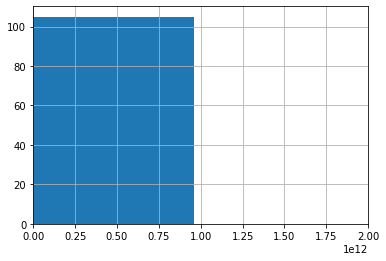

In [20]:
plt.xlim(right=2000000000000)
total_mean.hist(bins = 100)

In [24]:
total_mean.min()


-568.4859403737673

In [26]:
total_mean.max()

96264580695132.66

In [30]:
stats_list[0][4][:]

ch_1         -16.0
ch_10          0.0
ch_100         0.0
ch_101         0.0
ch_102         0.0
            ...   
ch_95    -131072.0
ch_96          0.0
ch_97          0.0
ch_98          0.0
ch_99          0.0
Length: 142, dtype: float64

In [31]:
with pd.option_context('display.max_rows', None, 'display.max_columns', None):  # more options can be specified also
    print(stats_list[0][4][:])

ch_1     -1.600000e+01
ch_10     0.000000e+00
ch_100    0.000000e+00
ch_101    0.000000e+00
ch_102    0.000000e+00
ch_103    0.000000e+00
ch_104   -1.075000e+02
ch_105    0.000000e+00
ch_106    0.000000e+00
ch_107    0.000000e+00
ch_108   -1.545000e+02
ch_109    0.000000e+00
ch_11     0.000000e+00
ch_110    0.000000e+00
ch_111    0.000000e+00
ch_112    0.000000e+00
ch_13     0.000000e+00
ch_14     0.000000e+00
ch_15     0.000000e+00
ch_16     0.000000e+00
ch_17     0.000000e+00
ch_177    0.000000e+00
ch_178    0.000000e+00
ch_179    0.000000e+00
ch_18     0.000000e+00
ch_181    0.000000e+00
ch_184    0.000000e+00
ch_185    0.000000e+00
ch_186    0.000000e+00
ch_187    0.000000e+00
ch_19     0.000000e+00
ch_198   -3.840000e+02
ch_199    0.000000e+00
ch_2      0.000000e+00
ch_20     0.000000e+00
ch_200   -3.840000e+02
ch_21     0.000000e+00
ch_218    0.000000e+00
ch_22     0.000000e+00
ch_226    0.000000e+00
ch_23     0.000000e+00
ch_24     0.000000e+00
ch_25     0.000000e+00
ch_257    0